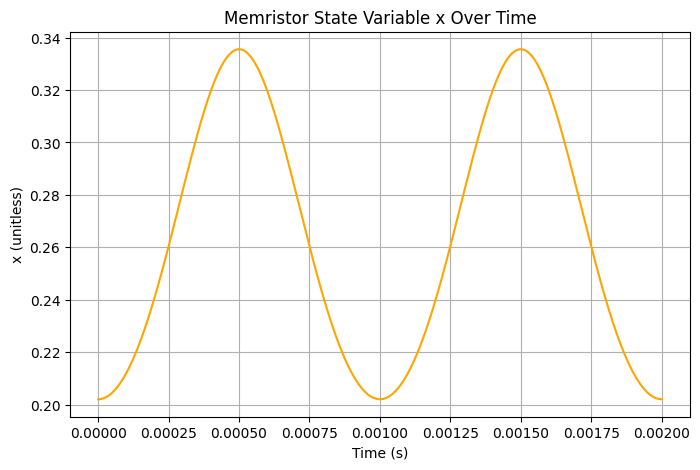

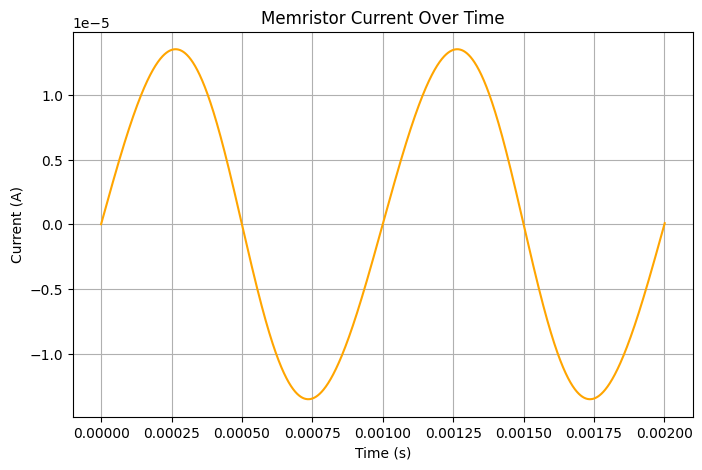

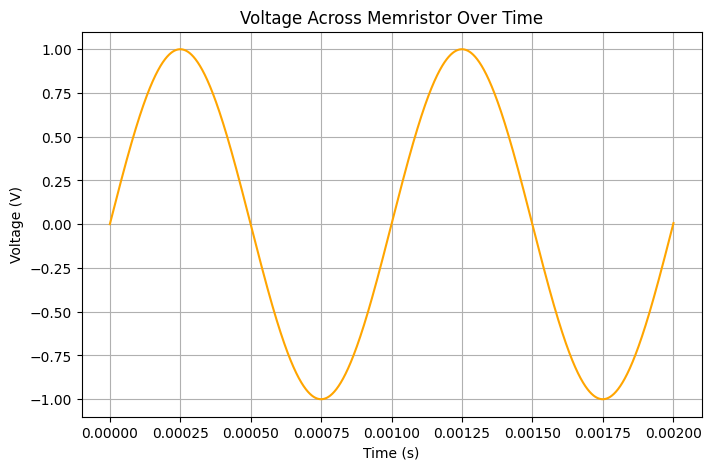

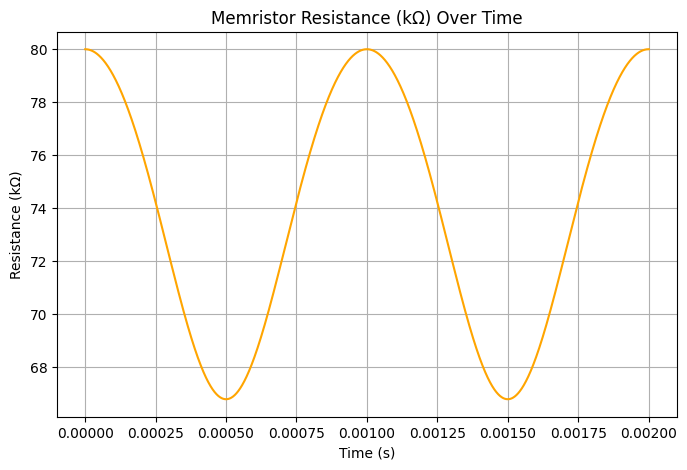

Initial Resistance: 80.00000 kΩ
Final Resistance:   79.99991 kΩ


,time (s),x (unitless),V_mem (V),I_mem (A),R_mem (Ohm)
0,0.000000,0.202020,0.000000,0.000000e+00,80000.000000
1,0.000001,0.202021,0.006283,7.853940e-08,79999.899723
2,0.000002,0.202024,0.012566,1.570763e-07,79999.598893
3,0.000003,0.202029,0.018848,2.356082e-07,79999.097514
4,0.000004,0.202036,0.025130,3.141325e-07,79998.395593
5,0.000005,0.202046,0.031411,3.926468e-07,79997.493201
6,0.000006,0.202057,0.037690,4.711485e-07,79996.390358
7,0.000007,0.202070,0.043968,5.496352e-07,79995.087064
8,0.000008,0.202085,0.050244,6.281044e-07,79993.583318
9,0.000009,0.202102,0.056519,7.065534e-07,79991.879121


In [7]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 2. Model parameters (adjusted for larger ΔR)
Ron   = 1e3       # Ω (low-resistance state)
Roff  = 100e3     # Ω (high-resistance state)
Rinit = 80e3      # Ω (initial resistance at t=0)
D     = 5e-9      # m (film thickness, halved from 10e-9 to 5e-9)
uv    = 1e-12    # m²/(V·s) (mobility, 10× larger than 1e-14)
p     = 1         # window-function exponent

# 3. Compute initial state-variable x0 from Rinit = Ron*x0 + Roff*(1 - x0)
x0 = (Roff - Rinit) / (Roff - Ron)

# 4. Time vector: simulate 0 to 2 ms in 1 µs steps
t = np.arange(0, 2e-3 + 1e-6, 1e-6)

# 5. Input voltage: 1 V amplitude sine at 1 kHz
def Vinput(time):
    return np.sin(2 * np.pi * 1e3 * time)

# 6. Window function: f(x,p) = 1 - (2*x - 1)^(2*p)
def window(x, p):
    return 1 - (2*x - 1)**(2*p)

# 7. State-derivative: dx/dt = (uv * Ron / D^2) * i(t) * f(x,p)
#    where i(t) = v(t)/R(x) and R(x) = Ron*x + Roff*(1 - x)
def dx_dt(x, time):
    V = Vinput(time)
    R = Ron * x + Roff * (1 - x)
    i = V / R
    return (i * uv * Ron / D**2) * window(x, p)

# 8. Integrate ODE
x = odeint(dx_dt, x0, t).flatten()

# 9. Compute memristance R_mem, voltage V_mem, and current I_mem
R_mem = Ron * x + Roff * (1 - x)   # Ω
V_mem = Vinput(t)                  # V
I_mem = V_mem / R_mem              # A

# 10. Assemble DataFrame
df = pd.DataFrame({
    'time (s)':      t,
    'x (unitless)':  x,
    'V_mem (V)':     V_mem,
    'I_mem (A)':     I_mem,
    'R_mem (Ohm)':   R_mem
})

# 11. Plot state variable x over time
plt.figure(figsize=(8,5))
plt.plot(df['time (s)'], df['x (unitless)'], color='orange')
plt.title('Memristor State Variable x Over Time')
plt.xlabel('Time (s)')
plt.ylabel('x (unitless)')
plt.grid(True)
plt.show()

# 12. Plot memristor current over time
plt.figure(figsize=(8,5))
plt.plot(df['time (s)'], df['I_mem (A)'], color='orange')
plt.title('Memristor Current Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.show()

# 13. Plot voltage across memristor over time
plt.figure(figsize=(8,5))
plt.plot(df['time (s)'], df['V_mem (V)'], color='orange')
plt.title('Voltage Across Memristor Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

# 14. Plot resistance over time (in kΩ)
plt.figure(figsize=(8,5))
plt.plot(df['time (s)'], df['R_mem (Ohm)'] / 1e3, color='orange')
plt.title('Memristor Resistance (kΩ) Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Resistance (kΩ)')
plt.grid(True)
plt.show()

# 15. Print initial & final resistance values
initial_R = df['R_mem (Ohm)'].iloc[0] / 1e3
final_R   = df['R_mem (Ohm)'].iloc[-1] / 1e3
print(f"Initial Resistance: {initial_R:.5f} kΩ")
print(f"Final Resistance:   {final_R:.5f} kΩ")

# 16. Show first 20 rows of the DataFrame
df.head(20)
